In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import glob

In [69]:
path = glob.glob("/kaggle/datasets/tariqmassaoudi/hespress/stories_*")

In [70]:
path

[]

In [3]:
stories_path = os.listdir('/content')

In [4]:
l = []
for x in stories_path:
  if x.startswith('stories_'):
    l.append(x)

In [5]:
l

['stories_politique.csv',
 'stories_medias.csv',
 'stories_regions.csv',
 'stories_sport.csv',
 'stories_marocains-du-monde.csv',
 'stories_economie.csv',
 'stories_orbites.csv',
 'stories_faits-divers.csv',
 'stories_art-et-culture.csv',
 'stories_tamazight.csv',
 'stories_societe.csv']

In [6]:
lst = []
for file in l:
    df = pd.read_csv(file, index_col=None, header=0)
    lst.append(df)

In [7]:
df = pd.concat(lst, axis=0, ignore_index=True)

In [11]:
df.head()

,id,title,date,author,story,topic
0,3a7f2f5e04dd11eba84c646e69d991ea,"رسمياً .. الجولة الثانية من ""المفاوضات الليبية...",الجمعة 02 أكتوبر 2020 - 16:00,هسبريس - عبد الرحيم العسري,أكدت مصادر موثوقة لجريدة هسبريس الإلكترونية أن...,politique
1,3b2663cc04dd11ebb293646e69d991ea,رئيس الحكومة يلتزم بحماية حقوق الشغيلة وإحداث ...,الجمعة 02 أكتوبر 2020 - 13:00,هسبريس - محمد الراجي (صور: منير محيمدات),شدد رئيس الحكومة، سعد الدين العثماني، على أن ا...,politique
2,3bc8521c04dd11ebb541646e69d991ea,"هل تشكل ""المعارضة"" بديلا عن أحزاب الأغلبية في ...",الجمعة 02 أكتوبر 2020 - 09:00,هسبريس من الرباط,يكاد يكون هناك إجماع على فشل الحكومة في تدبير ...,politique
3,3c5c092e04dd11eba4b7646e69d991ea,فرق مجلس النواب تستعد للدخول البرلماني الجديد,الجمعة 02 أكتوبر 2020 - 08:38,هسبريس من الرباط,عقد الحبيب المالكي، رئيس مجلس النواب، اجتماعا ...,politique
4,3d126e6404dd11eba070646e69d991ea,"الرباط تُنشِّط ""الدبلوماسية الروحية"" تجاه الأز...",الجمعة 02 أكتوبر 2020 - 05:00,هسبريس - مصطفى شاكري,تُواصل الرباط تنشيط جهازها الدبلوماسي بخصوص ال...,politique


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  11000 non-null  int64 
 1   id          11000 non-null  object
 2   title       11000 non-null  object
 3   date        11000 non-null  object
 4   author      11000 non-null  object
 5   story       11000 non-null  object
 6   topic       11000 non-null  object
dtypes: int64(1), object(6)
memory usage: 601.7+ KB


In [10]:
df.drop(['Unnamed: 0'],axis = 1, inplace = True)

# **number of examples per class**

In [12]:
df.topic.value_counts()

politique             1000
medias                1000
regions               1000
sport                 1000
marocains-du-monde    1000
economie              1000
orbites               1000
faits-divers          1000
art-et-culture        1000
tamazight             1000
societe               1000
Name: topic, dtype: int64

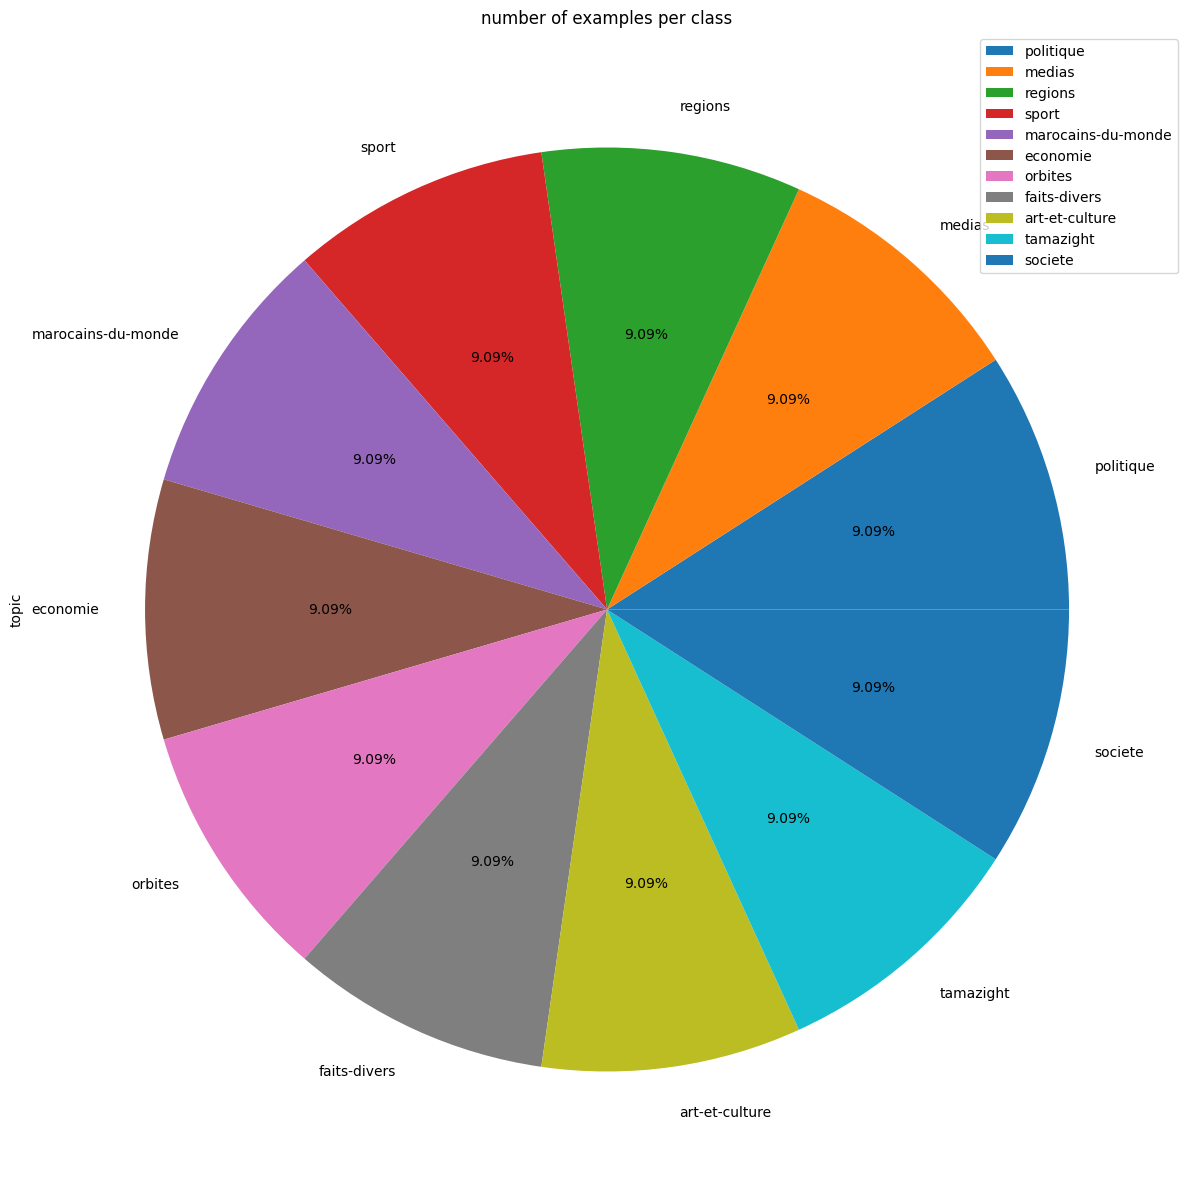

In [13]:
df.topic.value_counts().plot.pie(figsize=(15,15), autopct='%1.2f%%', fontsize = 10,title='number of examples per class')
plt.legend()

# **Top 10 Frequent Authors**

In [18]:
df.author.value_counts()

هسبريس من الرباط                              3941
أوعنا بلعيد                                    400
هسبريس - محمد الراجي                           344
هسبريس - وائل بورشاشن                          242
هسبريس - أمال كنين                             230
                                              ... 
هسبريس من خريبكة (صور: فؤاد بنيحيى)              1
محتوى إعلاني                                     1
دلفين تويتو*                                     1
هسبريس من الفقيه بنصالح (صور: فؤاد بنيحيى)       1
هسبريس- محمد بلقاسم (صورة: منير محيمدات)         1
Name: author, Length: 874, dtype: int64

In [30]:
top10_authors=df.author.value_counts().nlargest(10)

In [31]:
top10_authors

هسبريس من الرباط               3941
أوعنا بلعيد                     400
هسبريس - محمد الراجي            344
هسبريس - وائل بورشاشن           242
هسبريس - أمال كنين              230
هسبريس - عبد الرحيم العسري      190
هسبريس ـ فاطمة الزهراء صدور     185
إبراهيم مغراوي من مراكش         183
هسبريس من الدار البيضاء         174
هسبريس - عبد السلام الشامخ      157
Name: author, dtype: int64

In [39]:
top_10_values_names = top10_authors.index.tolist()
top_10_frequencies = top10_authors.tolist()

In [40]:
top_10_values_names

['هسبريس من الرباط',
 'أوعنا بلعيد',
 'هسبريس - محمد الراجي',
 'هسبريس - وائل بورشاشن',
 'هسبريس - أمال كنين',
 'هسبريس - عبد الرحيم العسري',
 'هسبريس ـ فاطمة الزهراء صدور',
 'إبراهيم مغراوي من مراكش',
 'هسبريس من الدار البيضاء',
 'هسبريس - عبد السلام الشامخ']

In [45]:
!pip install arabic_reshaper

In [48]:
import arabic_reshaper

In [51]:
pip install python-bidi

In [52]:
from bidi.algorithm import get_display

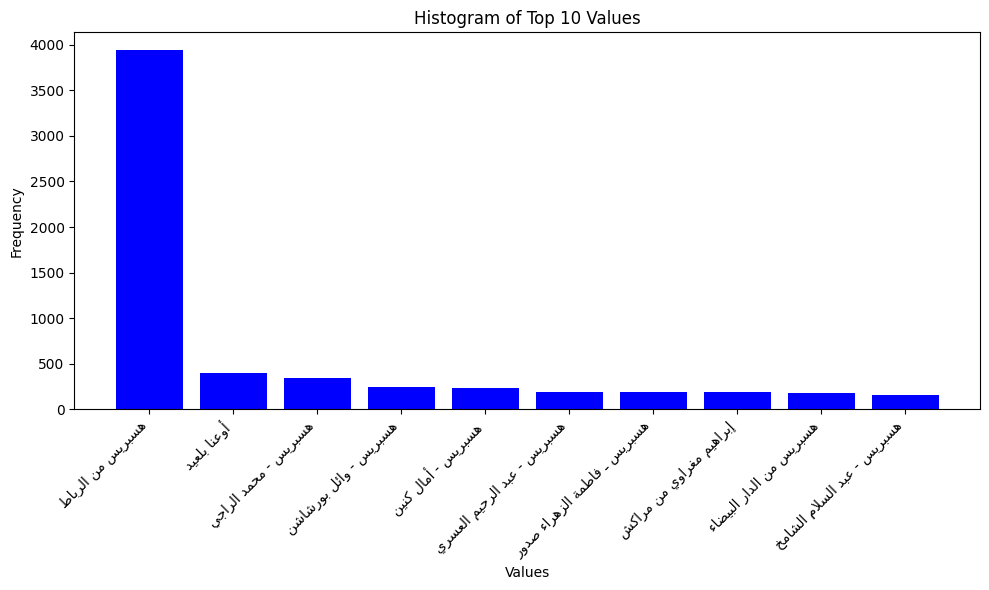

In [53]:
plt.figure(figsize=(10, 6))
reshaped_labels = [get_display(arabic_reshaper.reshape(label)) for label in top_10_values_names]
plt.bar(reshaped_labels, top_10_frequencies, color='blue')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Top 10 Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **lengths of examples in words**

In [58]:
import nltk

In [61]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [59]:
def tokenize_into_words(text):
    return nltk.word_tokenize(text)

def get_example_lengths(text_column):
    return text_column.apply(lambda text: len(tokenize_into_words(text)))

In [62]:
df['example_lengths'] = get_example_lengths(df['story'])

In [75]:
df.head()

,id,title,date,author,story,topic,example_lengths
0,3a7f2f5e04dd11eba84c646e69d991ea,"رسمياً .. الجولة الثانية من ""المفاوضات الليبية...",الجمعة 02 أكتوبر 2020 - 16:00,هسبريس - عبد الرحيم العسري,أكدت مصادر موثوقة لجريدة هسبريس الإلكترونية أن...,politique,322
1,3b2663cc04dd11ebb293646e69d991ea,رئيس الحكومة يلتزم بحماية حقوق الشغيلة وإحداث ...,الجمعة 02 أكتوبر 2020 - 13:00,هسبريس - محمد الراجي (صور: منير محيمدات),شدد رئيس الحكومة، سعد الدين العثماني، على أن ا...,politique,398
2,3bc8521c04dd11ebb541646e69d991ea,"هل تشكل ""المعارضة"" بديلا عن أحزاب الأغلبية في ...",الجمعة 02 أكتوبر 2020 - 09:00,هسبريس من الرباط,يكاد يكون هناك إجماع على فشل الحكومة في تدبير ...,politique,492
3,3c5c092e04dd11eba4b7646e69d991ea,فرق مجلس النواب تستعد للدخول البرلماني الجديد,الجمعة 02 أكتوبر 2020 - 08:38,هسبريس من الرباط,عقد الحبيب المالكي، رئيس مجلس النواب، اجتماعا ...,politique,169
4,3d126e6404dd11eba070646e69d991ea,"الرباط تُنشِّط ""الدبلوماسية الروحية"" تجاه الأز...",الجمعة 02 أكتوبر 2020 - 05:00,هسبريس - مصطفى شاكري,تُواصل الرباط تنشيط جهازها الدبلوماسي بخصوص ال...,politique,525


In [78]:
max(df.example_lengths.unique())

6345

In [71]:
top10_examples=df.example_lengths.value_counts().nlargest(10)

In [72]:
top10_examples

105    51
165    39
123    37
314    37
341    35
154    35
193    33
152    33
111    32
149    32
Name: example_lengths, dtype: int64

In [64]:
df.to_csv("allStories.csv",index=False)